In [ ]:
# Built first ml models to data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore, ks_2samp
import seaborn as sns

%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv(r'C:\Users\מיכאל\Desktop\air bnb germany project\df_final.csv', encoding='latin1',low_memory=False)
df.head()

,Host Response Time,Host Response Rate,Is Superhost,neighbourhood,Postal Code,Is Exact Location,Property Type,Room Type,Accomodates,Bathrooms,...,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Years From Today,SentimentScore
0,0.666667,100.0,f,Neuklln,12047.0,t,Apartment,Entire homeapt,4.0,1.0,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,8.895890,6.250000
1,0.666667,100.0,f,Prenzlauer Berg,10405.0,f,Apartment,Entire homeapt,2.0,1.0,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,8.854795,5.000000
2,1.000000,100.0,f,Mitte,10178.0,t,Apartment,Private room,2.0,1.0,...,92.0,10.0,8.0,10.0,10.0,10.0,9.0,f,9.016438,5.625000
3,1.000000,100.0,f,Mitte,10178.0,t,Apartment,Private room,2.0,1.0,...,92.0,10.0,8.0,10.0,10.0,10.0,9.0,f,9.016438,6.086957
4,1.000000,100.0,f,Mitte,10178.0,t,Apartment,Private room,2.0,1.0,...,92.0,10.0,8.0,10.0,10.0,10.0,9.0,f,9.016438,5.212766


In [3]:
df['Room Type'].value_counts()
# Convert categorical columns to dummy variables
df = pd.get_dummies(df, columns=[ 'Room Type'])

# chose category columns
categorical_columns = df.select_dtypes(include=['object', 'boolean']).columns.tolist()

In [4]:
# label encoded and getdummies
from sklearn.preprocessing import LabelEncoder

# Initialize a dictionary to hold label encoders
label_encoders = {}

# Step 2: Apply Label Encoding to remaining categorical columns
for column in categorical_columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
df

,Host Response Time,Host Response Rate,Is Superhost,neighbourhood,Postal Code,Is Exact Location,Property Type,Accomodates,Bathrooms,Bedrooms,...,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Years From Today,SentimentScore,Room Type_Entire homeapt,Room Type_Private room,Room Type_Shared room
0,0.666667,100.0,0,6,12047.0,1,0,4.0,1.0,1.0,...,10.0,10.0,10.0,10.0,0,8.895890,6.250000,1,0,0
1,0.666667,100.0,0,9,10405.0,0,0,2.0,1.0,1.0,...,10.0,10.0,10.0,10.0,0,8.854795,5.000000,1,0,0
2,1.000000,100.0,0,4,10178.0,1,0,2.0,1.0,1.0,...,10.0,10.0,10.0,9.0,0,9.016438,5.625000,0,1,0
3,1.000000,100.0,0,4,10178.0,1,0,2.0,1.0,1.0,...,10.0,10.0,10.0,9.0,0,9.016438,6.086957,0,1,0
4,1.000000,100.0,0,4,10178.0,1,0,2.0,1.0,1.0,...,10.0,10.0,10.0,9.0,0,9.016438,5.212766,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168996,0.333333,100.0,0,15,10245.0,1,0,9.0,1.0,1.0,...,10.0,10.0,10.0,10.0,1,11.408219,5.000000,0,1,0
168997,0.333333,100.0,1,7,10245.0,1,7,9.0,1.0,1.0,...,10.0,10.0,10.0,10.0,1,11.408219,4.230769,0,1,0
168998,0.333333,100.0,1,7,10245.0,1,7,9.0,1.0,1.0,...,10.0,10.0,10.0,10.0,1,11.408219,4.615385,0,1,0
168999,1.000000,100.0,1,7,13355.0,1,7,2.0,1.0,1.0,...,10.0,10.0,9.0,9.0,1,8.663014,5.425532,0,1,0


In [5]:
df.isna().sum()

Host Response Time          0
Host Response Rate          0
Is Superhost                0
neighbourhood               0
Postal Code                 0
Is Exact Location           0
Property Type               0
Accomodates                 0
Bathrooms                   0
Bedrooms                    0
Beds                        0
Price                       0
Guests Included             0
Min Nights                  0
Reviews                     0
Overall Rating              0
Accuracy Rating             0
Cleanliness Rating          0
Checkin Rating              0
Communication Rating        0
Location Rating             0
Value Rating                0
Instant Bookable            0
Years From Today            0
SentimentScore              0
Room Type_Entire homeapt    0
Room Type_Private room      0
Room Type_Shared room       0
dtype: int64

In [6]:
# fill NAN values with mean 

row_means = df.mean(axis=1)
# Fill NaN values with the corresponding row mean
df= df.apply(lambda row: row.fillna(row_means[row.name]), axis=1)
df.isna().sum()

Host Response Time          0
Host Response Rate          0
Is Superhost                0
neighbourhood               0
Postal Code                 0
Is Exact Location           0
Property Type               0
Accomodates                 0
Bathrooms                   0
Bedrooms                    0
Beds                        0
Price                       0
Guests Included             0
Min Nights                  0
Reviews                     0
Overall Rating              0
Accuracy Rating             0
Cleanliness Rating          0
Checkin Rating              0
Communication Rating        0
Location Rating             0
Value Rating                0
Instant Bookable            0
Years From Today            0
SentimentScore              0
Room Type_Entire homeapt    0
Room Type_Private room      0
Room Type_Shared room       0
dtype: int64

In [20]:
# save data in csv
df.to_csv(r'C:\Users\מיכאל\Desktop\air bnb germany project\df_level3final.csv',index=False)

In [7]:
# Extract all columns except 'Price' for feature variables
X = df.loc[:, df.columns != 'Price']

# Extract the 'Price' Target column as the target variable
y = df['Price']


In [8]:
!pip install xgboost

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import sklearn.metrics as metrics 


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regressionMetrics(y_true, y_pred):

    mse = mean_squared_error(y_true, y_pred)
    metrics = {
        'Mean Absolute Error': mean_absolute_error(y_true, y_pred),
        'Mean Squared Error': mse,
        'Root Mean Squared Error': np.sqrt(mse),
        'R^2 Score': r2_score(y_true, y_pred)
    }
    
    # Print the metrics
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")
    
    return metrics



In [10]:
models_list = pd.DataFrame()

In [11]:
#Linear Regression 
mod1 = LinearRegression()
mod1.fit(X,y)

pred1 = mod1.predict(X)
regressionMetrics(y, pred1)

Mean Absolute Error: 419.95
Mean Squared Error: 61706629.98
Root Mean Squared Error: 7855.36
R^2 Score: 0.00


{'Mean Absolute Error': 419.95431467610564,
 'Mean Squared Error': 61706629.97507349,
 'Root Mean Squared Error': 7855.356769432786,
 'R^2 Score': 0.0012555532275374537}

In [12]:
model_dict = {'model': "Linear Regression"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred1)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

Mean Absolute Error: 419.95
Mean Squared Error: 61706629.98
Root Mean Squared Error: 7855.36
R^2 Score: 0.00


,model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R^2 Score
0,Linear Regression,419.954315,6.170663e+07,7855.356769,0.001256


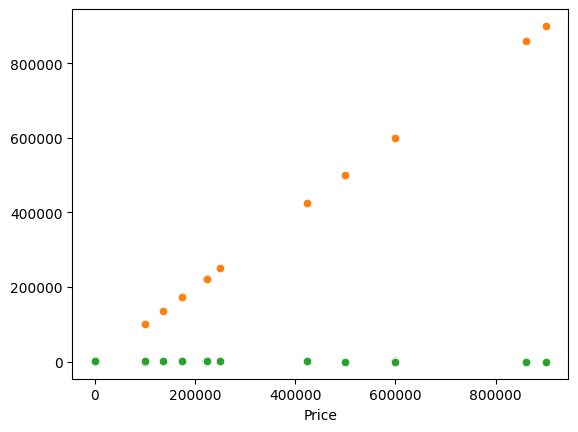

In [17]:
sns.scatterplot(x=y, y=pred1)
plt.show()

In [14]:
#Desicon Tree
mod2 = DecisionTreeRegressor(random_state=1)
mod2.fit(X,y)
pred2 = mod2.predict(X)
model_dict = {'model': "Decision Tree"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred2)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

Mean Absolute Error: 0.00
Mean Squared Error: 0.00
Root Mean Squared Error: 0.03
R^2 Score: 1.00


,model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R^2 Score
0,Linear Regression,419.954315,6.170663e+07,7855.356769,0.001256
1,Decision Tree,0.000118,1.183425e-03,0.034401,1.000000


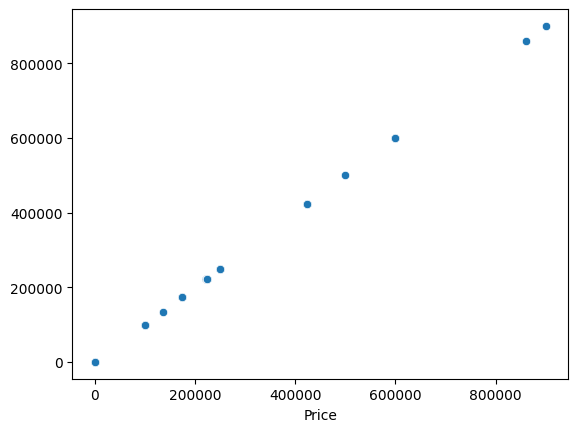

In [18]:
sns.scatterplot(x=y, y=pred2)
plt.show()

In [21]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

mod3 = RandomForestRegressor(random_state=1)
mod3.fit(X, y)

pred3 = mod3.predict(X)

# Assuming models_list is defined earlier and has the appropriate structure
model_dict = {'model': "RandomForestRegressor"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred3)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)

Mean Absolute Error: 28.33
Mean Squared Error: 2618702.08
Root Mean Squared Error: 1618.24
R^2 Score: 0.96


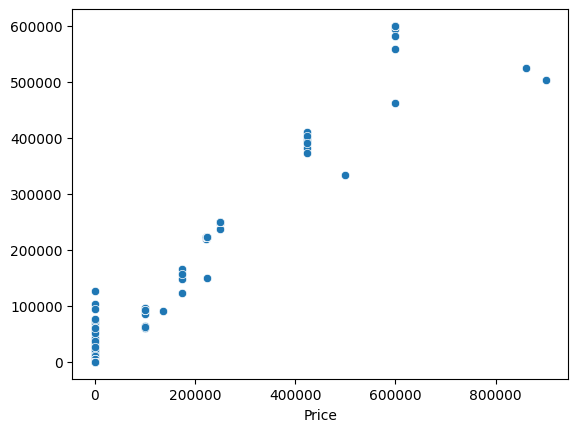

In [22]:
sns.scatterplot(x=y, y=pred3)
plt.show()

In [23]:
#Adaptive Boosting (ADABoost)
mod4 = AdaBoostRegressor(random_state=1)
mod4.fit(X,y)
pred4 = mod4.predict(X)
model_dict = {'model': "ADABoost"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred4)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

Mean Absolute Error: 9259.92
Mean Squared Error: 421181245.60
Root Mean Squared Error: 20522.70
R^2 Score: -5.82


,model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R^2 Score
0,Linear Regression,419.954315,6.170663e+07,7855.356769,0.001256
1,Decision Tree,0.000118,1.183425e-03,0.034401,1.000000
2,RandomForestRegressor,28.326756,2.618702e+06,1618.240427,0.957615
3,ADABoost,9259.923950,4.211812e+08,20522.700738,-5.816973


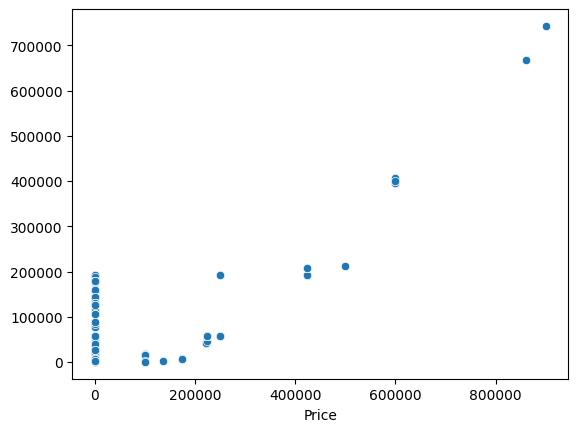

In [24]:
sns.scatterplot(x=y, y=pred4)
plt.show()

In [25]:
#Gradient Boosting Machine (GBM)
mod5 = GradientBoostingRegressor(random_state=1)
mod5.fit(X,y)

pred5 = mod5.predict(X)
model_dict = {'model': "GBM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred5)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

Mean Absolute Error: 222.16
Mean Squared Error: 18853970.62
Root Mean Squared Error: 4342.12
R^2 Score: 0.69


,model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R^2 Score
0,Linear Regression,419.954315,6.170663e+07,7855.356769,0.001256
1,Decision Tree,0.000118,1.183425e-03,0.034401,1.000000
2,RandomForestRegressor,28.326756,2.618702e+06,1618.240427,0.957615
3,ADABoost,9259.923950,4.211812e+08,20522.700738,-5.816973
4,GBM,222.162574,1.885397e+07,4342.115915,0.694842


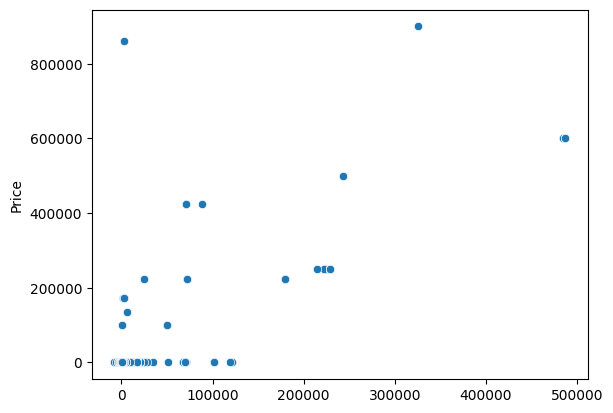

In [26]:
sns.scatterplot(y=y, x=pred5)
plt.show()

In [27]:
#Support Vector Machine (SVM)
mod6 = SVR()
mod6.fit(X,y)

pred6 = mod6.predict(X)
model_dict = {'model': "SVM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred6)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

Mean Absolute Error: 199.98
Mean Squared Error: 61818323.98
Root Mean Squared Error: 7862.46
R^2 Score: -0.00


,model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R^2 Score
0,Linear Regression,419.954315,6.170663e+07,7855.356769,0.001256
1,Decision Tree,0.000118,1.183425e-03,0.034401,1.000000
2,RandomForestRegressor,28.326756,2.618702e+06,1618.240427,0.957615
3,ADABoost,9259.923950,4.211812e+08,20522.700738,-5.816973
4,GBM,222.162574,1.885397e+07,4342.115915,0.694842
5,SVM,199.980014,6.181832e+07,7862.462972,-0.000552


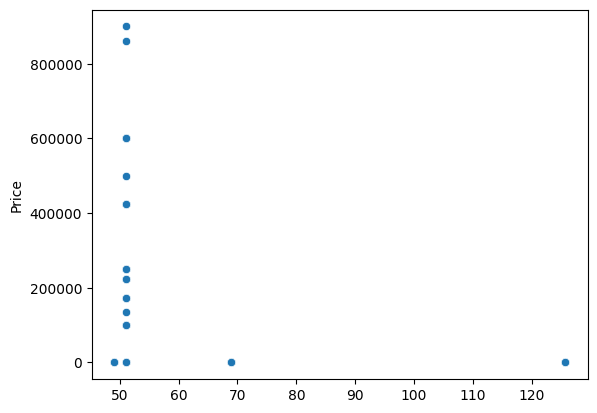

In [28]:
sns.scatterplot(y=y, x=pred6)
plt.show()

In [29]:
#XGBoost Regressor
mod7= xgb.XGBRegressor()
mod7.fit(X,y)
pred7 = mod7.predict(X)
model_dict = {'model': "XGB"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred7)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

Mean Absolute Error: 88.98
Mean Squared Error: 313008.05
Root Mean Squared Error: 559.47
R^2 Score: 0.99


,model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R^2 Score
0,Linear Regression,419.954315,6.170663e+07,7855.356769,0.001256
1,Decision Tree,0.000118,1.183425e-03,0.034401,1.000000
2,RandomForestRegressor,28.326756,2.618702e+06,1618.240427,0.957615
3,ADABoost,9259.923950,4.211812e+08,20522.700738,-5.816973
4,GBM,222.162574,1.885397e+07,4342.115915,0.694842
5,SVM,199.980014,6.181832e+07,7862.462972,-0.000552
6,XGB,88.984739,3.130080e+05,559.471223,0.994934


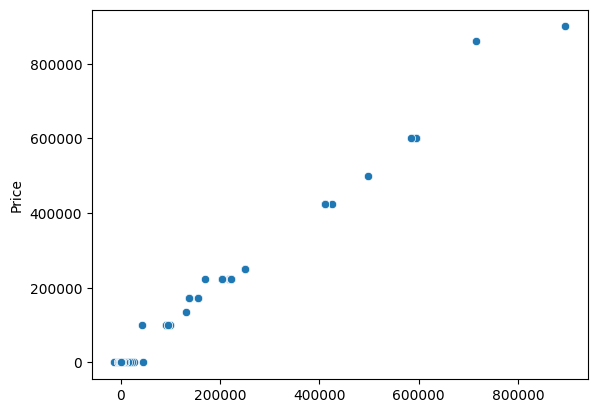

In [30]:
sns.scatterplot(y=y, x=pred7)
plt.show()

In [31]:
#Model Selection
models_list.sort_values('Mean Absolute Error')

,model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R^2 Score
1,Decision Tree,0.000118,1.183425e-03,0.034401,1.000000
2,RandomForestRegressor,28.326756,2.618702e+06,1618.240427,0.957615
6,XGB,88.984739,3.130080e+05,559.471223,0.994934
5,SVM,199.980014,6.181832e+07,7862.462972,-0.000552
4,GBM,222.162574,1.885397e+07,4342.115915,0.694842
0,Linear Regression,419.954315,6.170663e+07,7855.356769,0.001256
3,ADABoost,9259.923950,4.211812e+08,20522.700738,-5.816973


In [32]:
models_list.sort_values('Mean Squared Error')

,model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R^2 Score
1,Decision Tree,0.000118,1.183425e-03,0.034401,1.000000
6,XGB,88.984739,3.130080e+05,559.471223,0.994934
2,RandomForestRegressor,28.326756,2.618702e+06,1618.240427,0.957615
4,GBM,222.162574,1.885397e+07,4342.115915,0.694842
0,Linear Regression,419.954315,6.170663e+07,7855.356769,0.001256
5,SVM,199.980014,6.181832e+07,7862.462972,-0.000552
3,ADABoost,9259.923950,4.211812e+08,20522.700738,-5.816973
